In [2]:
import pandas as pd
import numpy as np
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

In [3]:
df = pd.read_csv("train.tsv", sep = "\t")
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [4]:
df = df.drop(df.columns[[0, 1]], axis=1) 

#df.drop(['PhraseId', 'SentenceId'], axis=1, inplace=True)

In [5]:
df

,Phrase,Sentiment
0,A series of escapades demonstrating the adage ...,1
1,A series of escapades demonstrating the adage ...,2
2,A series,2
3,A,2
4,series,2
...,...,...
156055,Hearst 's,2
156056,forced avuncular chortles,1
156057,avuncular chortles,3
156058,avuncular,2


In [6]:
df.columns = ["Ahmet", "Mehmet"]

In [7]:
df

,Ahmet,Mehmet
0,A series of escapades demonstrating the adage ...,1
1,A series of escapades demonstrating the adage ...,2
2,A series,2
3,A,2
4,series,2
...,...,...
156055,Hearst 's,2
156056,forced avuncular chortles,1
156057,avuncular chortles,3
156058,avuncular,2


In [8]:
df["Mehmet"].value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Mehmet, dtype: int64

In [9]:
# Amacimiz puani yoruma gore tahmin etmek.

In [10]:
#df.drop(['SentenceId'] == 2, axis=0, inplace=True)

df = df.drop(df[df['Mehmet'] == 2].index, axis=0)

In [11]:
df

,Ahmet,Mehmet
0,A series of escapades demonstrating the adage ...,1
21,good for the goose,3
22,good,3
33,"the gander , some of which occasionally amuses...",1
46,amuses,3
...,...,...
156047,quietly suggesting the sadness and obsession b...,1
156051,sadness and obsession,1
156052,sadness and,1
156056,forced avuncular chortles,1


In [12]:
df["Mehmet"].value_counts()

3    32927
1    27273
4     9206
0     7072
Name: Mehmet, dtype: int64

In [13]:
df.Mehmet.replace([0, 1, 3, 4], ["negative", "negative", "positive", "positive"], inplace=True)

In [14]:
df

,Ahmet,Mehmet
0,A series of escapades demonstrating the adage ...,negative
21,good for the goose,positive
22,good,positive
33,"the gander , some of which occasionally amuses...",negative
46,amuses,positive
...,...,...
156047,quietly suggesting the sadness and obsession b...,negative
156051,sadness and obsession,negative
156052,sadness and,negative
156056,forced avuncular chortles,negative


In [15]:
df["Mehmet"].value_counts()

positive    42133
negative    34345
Name: Mehmet, dtype: int64

In [15]:
stop_words = stopwords.words('english')
lem = WordNetLemmatizer()

def cleaning(data):
    # 1.Step tokenization yapacak
    text_tokens = word_tokenize(data) # removed the .lower intentionaly 
    
    # 2.Step Remove Puncs
    tokens_without_puncs = [w for w in text_tokens if w.isalpha()]
    
    # 3.Step Remove Stopwords
    tokens_without_sw = [t for t in tokens_without_puncs if t not in stop_words]
    
    # 4.Step Lemmatize
    text_cleaned = [lem.lemmatize(t) for t in tokens_without_sw]
    
    # Joining
    return " ".join(text_cleaned)

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer

pipeline =Pipeline([
    
    ("bow", TfidfVectorizer(analyzer = cleaning)),
    ("tfidf", TfidfTransformer()),
    ("classifier", RandomForestClassifier())
    
])

X = df["Ahmet"]
y = df["Mehmet"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[4889 1896]
 [1096 7415]]
              precision    recall  f1-score   support

    negative       0.82      0.72      0.77      6785
    positive       0.80      0.87      0.83      8511

    accuracy                           0.80     15296
   macro avg       0.81      0.80      0.80     15296
weighted avg       0.81      0.80      0.80     15296



In [16]:
stop_words = stopwords.words('english')
lem = WordNetLemmatizer()

def cleaning(data):
    # 1.Step tokenization yapacak
    text_tokens = word_tokenize(data) # removed the .lower intentionaly 
    
    # 2.Step Remove Puncs
    tokens_without_puncs = [w for w in text_tokens if w.isalpha()]
    
    # 3.Step Remove Stopwords
    tokens_without_sw = [t for t in tokens_without_puncs if t not in stop_words]
    
    # 4.Step Lemmatize
    text_cleaned = [lem.lemmatize(t) for t in tokens_without_sw]
    
    # Joining
    return " ".join(text_cleaned)

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer

pipeline =Pipeline([
    
    ("bow", TfidfVectorizer(analyzer = cleaning)),
    ("tfidf", TfidfTransformer()),
    ("classifier", XGBClassifier())
    
])

X = df["Ahmet"]
y = df["Mehmet"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3754 3031]
 [1626 6885]]
              precision    recall  f1-score   support

    negative       0.70      0.55      0.62      6785
    positive       0.69      0.81      0.75      8511

    accuracy                           0.70     15296
   macro avg       0.70      0.68      0.68     15296
weighted avg       0.70      0.70      0.69     15296



In [23]:
stop_words = stopwords.words('english')
lem = WordNetLemmatizer()

def cleaning(data):
    # 1.Step tokenization yapacak
    text_tokens = word_tokenize(data) # removed the .lower intentionaly 
    
    # 2.Step Remove Puncs
    tokens_without_puncs = [w for w in text_tokens if w.isalpha()]
    
    # 3.Step Remove Stopwords
    tokens_without_sw = [t for t in tokens_without_puncs if t not in stop_words]
    
    # 4.Step Lemmatize
    text_cleaned = [lem.lemmatize(t) for t in tokens_without_sw]
    
    # Joining
    return " ".join(text_cleaned)

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer

pipeline =Pipeline([
    
    ("bow", TfidfVectorizer(analyzer = cleaning)),
    ("tfidf", TfidfTransformer()),
    ("classifier", LogisticRegression())
    
])

X = df["Ahmet"]
y = df["Mehmet"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2390 4395]
 [1807 6704]]
              precision    recall  f1-score   support

    negative       0.57      0.35      0.44      6785
    positive       0.60      0.79      0.68      8511

    accuracy                           0.59     15296
   macro avg       0.59      0.57      0.56     15296
weighted avg       0.59      0.59      0.57     15296



In [24]:
stop_words = stopwords.words('english')
lem = WordNetLemmatizer()

def cleaning(data):
    # 1.Step tokenization yapacak
    text_tokens = word_tokenize(data) # removed the .lower intentionaly 
    
    # 2.Step Remove Puncs
    tokens_without_puncs = [w for w in text_tokens if w.isalpha()]
    
    # 3.Step Remove Stopwords
    tokens_without_sw = [t for t in tokens_without_puncs if t not in stop_words]
    
    # 4.Step Lemmatize
    text_cleaned = [lem.lemmatize(t) for t in tokens_without_sw]
    
    # Joining
    return " ".join(text_cleaned)

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer

pipeline =Pipeline([
    
    ("bow", TfidfVectorizer(analyzer = cleaning)),
    ("tfidf", TfidfTransformer()),
    ("classifier", MultinomialNB())
    
])

X = df["Ahmet"]
y = df["Mehmet"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 406 6379]
 [ 280 8231]]
              precision    recall  f1-score   support

    negative       0.59      0.06      0.11      6785
    positive       0.56      0.97      0.71      8511

    accuracy                           0.56     15296
   macro avg       0.58      0.51      0.41     15296
weighted avg       0.58      0.56      0.44     15296



In [25]:
stop_words = stopwords.words('english')
lem = WordNetLemmatizer()

def cleaning(data):
    # 1.Step tokenization yapacak
    text_tokens = word_tokenize(data) # removed the .lower intentionaly 
    
    # 2.Step Remove Puncs
    tokens_without_puncs = [w for w in text_tokens if w.isalpha()]
    
    # 3.Step Remove Stopwords
    tokens_without_sw = [t for t in tokens_without_puncs if t not in stop_words]
    
    # 4.Step Lemmatize
    text_cleaned = [lem.lemmatize(t) for t in tokens_without_sw]
    
    # Joining
    return " ".join(text_cleaned)

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer

pipeline =Pipeline([
    
    ("bow", TfidfVectorizer(analyzer = cleaning)),
    ("tfidf", TfidfTransformer()),
    ("classifier", SVC())
    
])

X = df["Ahmet"]
y = df["Mehmet"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3601 3184]
 [1661 6850]]
              precision    recall  f1-score   support

    negative       0.68      0.53      0.60      6785
    positive       0.68      0.80      0.74      8511

    accuracy                           0.68     15296
   macro avg       0.68      0.67      0.67     15296
weighted avg       0.68      0.68      0.68     15296



In [18]:
stop_words = stopwords.words('english')
lem = WordNetLemmatizer()

def cleaning(data):
    # 1.Step tokenization yapacak
    text_tokens = word_tokenize(data) # removed the .lower intentionaly 
    
    # 2.Step Remove Puncs
    tokens_without_puncs = [w for w in text_tokens if w.isalpha()]
    
    # 3.Step Remove Stopwords
    tokens_without_sw = [t for t in tokens_without_puncs if t not in stop_words]
    
    # 4.Step Lemmatize
    text_cleaned = [lem.lemmatize(t) for t in tokens_without_sw]
    
    # Joining
    return " ".join(text_cleaned)

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV 
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer

rf_params = {"n_estimators" : [50, 100], "max_depth" : [3, 5, 7], "max_features" : [2, 4, 6], "min_samples_split" : [2, 4, 6]}

pipeline =Pipeline([
    
    ("bow", TfidfVectorizer(analyzer = cleaning)),
    ("tfidf", TfidfTransformer()),
    ("classifier", RandomForestClassifier())
    
])

In [20]:
X = df["Ahmet"]
y = df["Mehmet"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

rf_params = {"classifier__n_estimators" : [50, 100], 
             "classifier__max_depth" : [3, 5, 7],
             "classifier__max_features" : [2, 4, 6],
             "classifier__min_samples_split" : [2, 4, 6]}
search = GridSearchCV(pipeline, rf_params, cv = 5, verbose = 2)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)


Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] classifier__max_depth=3, classifier__max_features=2, classifier__min_samples_split=2, classifier__n_estimators=50 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  classifier__max_depth=3, classifier__max_features=2, classifier__min_samples_split=2, classifier__n_estimators=50, total=  12.2s
[CV] classifier__max_depth=3, classifier__max_features=2, classifier__min_samples_split=2, classifier__n_estimators=50 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.2s remaining:    0.0s


[CV]  classifier__max_depth=3, classifier__max_features=2, classifier__min_samples_split=2, classifier__n_estimators=50, total=  12.7s
[CV] classifier__max_depth=3, classifier__max_features=2, classifier__min_samples_split=2, classifier__n_estimators=50 
[CV]  classifier__max_depth=3, classifier__max_features=2, classifier__min_samples_split=2, classifier__n_estimators=50, total=  12.6s
[CV] classifier__max_depth=3, classifier__max_features=2, classifier__min_samples_split=2, classifier__n_estimators=50 
[CV]  classifier__max_depth=3, classifier__max_features=2, classifier__min_samples_split=2, classifier__n_estimators=50, total=  11.9s
[CV] classifier__max_depth=3, classifier__max_features=2, classifier__min_samples_split=2, classifier__n_estimators=50 
[CV]  classifier__max_depth=3, classifier__max_features=2, classifier__min_samples_split=2, classifier__n_estimators=50, total=  11.9s
[CV] classifier__max_depth=3, classifier__max_features=2, classifier__min_samples_split=2, classifie

[CV]  classifier__max_depth=3, classifier__max_features=4, classifier__min_samples_split=2, classifier__n_estimators=50, total=  12.3s
[CV] classifier__max_depth=3, classifier__max_features=4, classifier__min_samples_split=2, classifier__n_estimators=100 
[CV]  classifier__max_depth=3, classifier__max_features=4, classifier__min_samples_split=2, classifier__n_estimators=100, total=  13.9s
[CV] classifier__max_depth=3, classifier__max_features=4, classifier__min_samples_split=2, classifier__n_estimators=100 
[CV]  classifier__max_depth=3, classifier__max_features=4, classifier__min_samples_split=2, classifier__n_estimators=100, total=  13.5s
[CV] classifier__max_depth=3, classifier__max_features=4, classifier__min_samples_split=2, classifier__n_estimators=100 
[CV]  classifier__max_depth=3, classifier__max_features=4, classifier__min_samples_split=2, classifier__n_estimators=100, total=  13.5s
[CV] classifier__max_depth=3, classifier__max_features=4, classifier__min_samples_split=2, cla

[CV]  classifier__max_depth=3, classifier__max_features=6, classifier__min_samples_split=2, classifier__n_estimators=100, total=  14.4s
[CV] classifier__max_depth=3, classifier__max_features=6, classifier__min_samples_split=2, classifier__n_estimators=100 
[CV]  classifier__max_depth=3, classifier__max_features=6, classifier__min_samples_split=2, classifier__n_estimators=100, total=  15.2s
[CV] classifier__max_depth=3, classifier__max_features=6, classifier__min_samples_split=2, classifier__n_estimators=100 
[CV]  classifier__max_depth=3, classifier__max_features=6, classifier__min_samples_split=2, classifier__n_estimators=100, total=  14.8s
[CV] classifier__max_depth=3, classifier__max_features=6, classifier__min_samples_split=2, classifier__n_estimators=100 
[CV]  classifier__max_depth=3, classifier__max_features=6, classifier__min_samples_split=2, classifier__n_estimators=100, total=  17.0s
[CV] classifier__max_depth=3, classifier__max_features=6, classifier__min_samples_split=4, cl

[CV]  classifier__max_depth=5, classifier__max_features=2, classifier__min_samples_split=2, classifier__n_estimators=100, total=  15.5s
[CV] classifier__max_depth=5, classifier__max_features=2, classifier__min_samples_split=2, classifier__n_estimators=100 
[CV]  classifier__max_depth=5, classifier__max_features=2, classifier__min_samples_split=2, classifier__n_estimators=100, total=  13.9s
[CV] classifier__max_depth=5, classifier__max_features=2, classifier__min_samples_split=4, classifier__n_estimators=50 
[CV]  classifier__max_depth=5, classifier__max_features=2, classifier__min_samples_split=4, classifier__n_estimators=50, total=  13.0s
[CV] classifier__max_depth=5, classifier__max_features=2, classifier__min_samples_split=4, classifier__n_estimators=50 
[CV]  classifier__max_depth=5, classifier__max_features=2, classifier__min_samples_split=4, classifier__n_estimators=50, total=  14.9s
[CV] classifier__max_depth=5, classifier__max_features=2, classifier__min_samples_split=4, classi

[CV]  classifier__max_depth=5, classifier__max_features=4, classifier__min_samples_split=4, classifier__n_estimators=50, total=  13.2s
[CV] classifier__max_depth=5, classifier__max_features=4, classifier__min_samples_split=4, classifier__n_estimators=50 
[CV]  classifier__max_depth=5, classifier__max_features=4, classifier__min_samples_split=4, classifier__n_estimators=50, total=  13.2s
[CV] classifier__max_depth=5, classifier__max_features=4, classifier__min_samples_split=4, classifier__n_estimators=50 
[CV]  classifier__max_depth=5, classifier__max_features=4, classifier__min_samples_split=4, classifier__n_estimators=50, total=  13.1s
[CV] classifier__max_depth=5, classifier__max_features=4, classifier__min_samples_split=4, classifier__n_estimators=50 
[CV]  classifier__max_depth=5, classifier__max_features=4, classifier__min_samples_split=4, classifier__n_estimators=50, total=  13.4s
[CV] classifier__max_depth=5, classifier__max_features=4, classifier__min_samples_split=4, classifie

[CV]  classifier__max_depth=5, classifier__max_features=6, classifier__min_samples_split=4, classifier__n_estimators=50, total=  16.2s
[CV] classifier__max_depth=5, classifier__max_features=6, classifier__min_samples_split=4, classifier__n_estimators=50 
[CV]  classifier__max_depth=5, classifier__max_features=6, classifier__min_samples_split=4, classifier__n_estimators=50, total=  16.5s
[CV] classifier__max_depth=5, classifier__max_features=6, classifier__min_samples_split=4, classifier__n_estimators=100 
[CV]  classifier__max_depth=5, classifier__max_features=6, classifier__min_samples_split=4, classifier__n_estimators=100, total=  19.9s
[CV] classifier__max_depth=5, classifier__max_features=6, classifier__min_samples_split=4, classifier__n_estimators=100 
[CV]  classifier__max_depth=5, classifier__max_features=6, classifier__min_samples_split=4, classifier__n_estimators=100, total=  19.2s
[CV] classifier__max_depth=5, classifier__max_features=6, classifier__min_samples_split=4, class

[CV]  classifier__max_depth=7, classifier__max_features=2, classifier__min_samples_split=4, classifier__n_estimators=100, total=  16.3s
[CV] classifier__max_depth=7, classifier__max_features=2, classifier__min_samples_split=4, classifier__n_estimators=100 
[CV]  classifier__max_depth=7, classifier__max_features=2, classifier__min_samples_split=4, classifier__n_estimators=100, total=  14.9s
[CV] classifier__max_depth=7, classifier__max_features=2, classifier__min_samples_split=4, classifier__n_estimators=100 
[CV]  classifier__max_depth=7, classifier__max_features=2, classifier__min_samples_split=4, classifier__n_estimators=100, total=  14.8s
[CV] classifier__max_depth=7, classifier__max_features=2, classifier__min_samples_split=4, classifier__n_estimators=100 
[CV]  classifier__max_depth=7, classifier__max_features=2, classifier__min_samples_split=4, classifier__n_estimators=100, total=  14.5s
[CV] classifier__max_depth=7, classifier__max_features=2, classifier__min_samples_split=6, cl

[CV]  classifier__max_depth=7, classifier__max_features=4, classifier__min_samples_split=4, classifier__n_estimators=100, total=  17.2s
[CV] classifier__max_depth=7, classifier__max_features=4, classifier__min_samples_split=4, classifier__n_estimators=100 
[CV]  classifier__max_depth=7, classifier__max_features=4, classifier__min_samples_split=4, classifier__n_estimators=100, total=  18.4s
[CV] classifier__max_depth=7, classifier__max_features=4, classifier__min_samples_split=6, classifier__n_estimators=50 
[CV]  classifier__max_depth=7, classifier__max_features=4, classifier__min_samples_split=6, classifier__n_estimators=50, total=  16.4s
[CV] classifier__max_depth=7, classifier__max_features=4, classifier__min_samples_split=6, classifier__n_estimators=50 
[CV]  classifier__max_depth=7, classifier__max_features=4, classifier__min_samples_split=6, classifier__n_estimators=50, total=  15.6s
[CV] classifier__max_depth=7, classifier__max_features=4, classifier__min_samples_split=6, classi

[CV]  classifier__max_depth=7, classifier__max_features=6, classifier__min_samples_split=6, classifier__n_estimators=50, total=  15.5s
[CV] classifier__max_depth=7, classifier__max_features=6, classifier__min_samples_split=6, classifier__n_estimators=50 
[CV]  classifier__max_depth=7, classifier__max_features=6, classifier__min_samples_split=6, classifier__n_estimators=50, total=  15.5s
[CV] classifier__max_depth=7, classifier__max_features=6, classifier__min_samples_split=6, classifier__n_estimators=50 
[CV]  classifier__max_depth=7, classifier__max_features=6, classifier__min_samples_split=6, classifier__n_estimators=50, total=  15.7s
[CV] classifier__max_depth=7, classifier__max_features=6, classifier__min_samples_split=6, classifier__n_estimators=50 
[CV]  classifier__max_depth=7, classifier__max_features=6, classifier__min_samples_split=6, classifier__n_estimators=50, total=  15.6s
[CV] classifier__max_depth=7, classifier__max_features=6, classifier__min_samples_split=6, classifie

[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed: 71.4min finished


Best parameter (CV score=0.600):
{'classifier__max_depth': 7, 'classifier__max_features': 6, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}


In [25]:
"""[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed: 71.4min finished
Best parameter (CV score=0.600):
{'classifier__max_depth': 7, 'classifier__max_features': 6, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100"""

"[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed: 71.4min finished\nBest parameter (CV score=0.600):\n{'classifier__max_depth': 7, 'classifier__max_features': 6, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100"

In [27]:
stop_words = stopwords.words('english')
lem = WordNetLemmatizer()

def cleaning(data):
    # 1.Step tokenization yapacak
    text_tokens = word_tokenize(data) # removed the .lower intentionaly 
    
    # 2.Step Remove Puncs
    tokens_without_puncs = [w for w in text_tokens if w.isalpha()]
    
    # 3.Step Remove Stopwords
    tokens_without_sw = [t for t in tokens_without_puncs if t not in stop_words]
    
    # 4.Step Lemmatize
    text_cleaned = [lem.lemmatize(t) for t in tokens_without_sw]
    
    # Joining
    return " ".join(text_cleaned)

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer

pipeline =Pipeline([
    
    ("bow", TfidfVectorizer(analyzer = cleaning)),
    ("tfidf", TfidfTransformer()),
    ("classifier", RandomForestClassifier(max_features= 13, 
                                          min_samples_split= 2, 
                                          n_estimators= 4000,
                                          max_depth= 10)) 
])

X = df["Ahmet"]
y = df["Mehmet"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2717 4068]
 [ 916 7595]]
              precision    recall  f1-score   support

    negative       0.75      0.40      0.52      6785
    positive       0.65      0.89      0.75      8511

    accuracy                           0.67     15296
   macro avg       0.70      0.65      0.64     15296
weighted avg       0.69      0.67      0.65     15296



In [49]:
pos_words_df = df[df['Mehmet']=='positive'][['Ahmet']]
pos_words_df

,Ahmet
21,good for the goose
22,good
46,amuses
63,"This quiet , introspective and entertaining in..."
64,"This quiet , introspective and entertaining in..."
...,...
156012,great job
156014,anchoring the characters in the emotional real...
156023,-LRB- Tries -RRB-
156043,is darkly atmospheric


In [48]:
neg_words_df = df[df['Mehmet']=='negative'][['Ahmet']]
neg_words_df

,Ahmet
0,A series of escapades demonstrating the adage ...
33,"the gander , some of which occasionally amuses..."
47,but none of which amounts to much of a story
49,none of which amounts to much of a story
81,"Even fans of Ismail Merchant 's work , I suspe..."
...,...
156036,substitute plot for personality
156047,quietly suggesting the sadness and obsession b...
156051,sadness and obsession
156052,sadness and


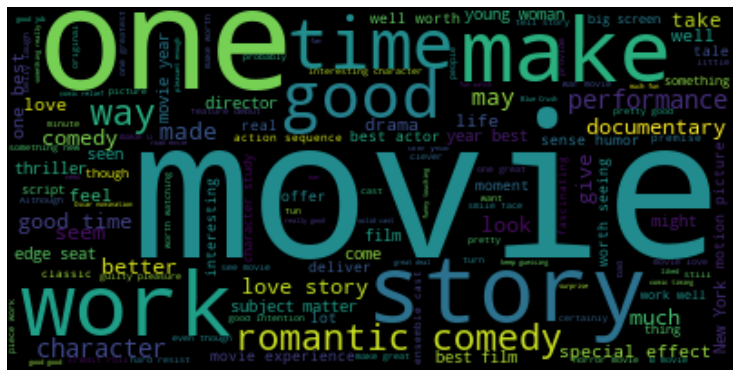

In [50]:
stop_words = stopwords.words('english')
stop_words.append('film')
lem = WordNetLemmatizer()

def cleaning(data):
    # 1.Step tokenization yapacak
    text_tokens = word_tokenize(data) # removed the .lower intentionaly 
    
    # 2.Step Remove Puncs
    tokens_without_puncs = [w for w in text_tokens if w.isalpha()]
    
    # 3.Step Remove Stopwords
    tokens_without_sw = [t for t in tokens_without_puncs if t not in stop_words]
    
    # 4.Step Lemmatize
    text_cleaned = [lem.lemmatize(t) for t in tokens_without_sw]
    
    # Joining
    return " ".join(text_cleaned)

pos_words = pos_words_df['Ahmet'].apply(cleaning)
from wordcloud import WordCloud
import matplotlib.pyplot as plt
original = " ".join(pos_words)
wordcloud = WordCloud(background_color = 'white', max_words = 100)

wordcloud.generate(original)

wordcloud = WordCloud( max_words = 900)
wordcloud.generate(original)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

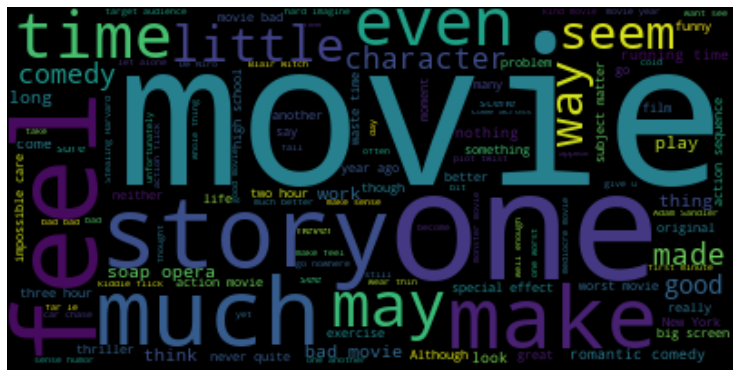

In [51]:
stop_words = stopwords.words('english')
stop_words.append('film')
lem = WordNetLemmatizer()

def cleaning(data):
    # 1.Step tokenization yapacak
    text_tokens = word_tokenize(data) # removed the .lower intentionaly 
    
    # 2.Step Remove Puncs
    tokens_without_puncs = [w for w in text_tokens if w.isalpha()]
    
    # 3.Step Remove Stopwords
    tokens_without_sw = [t for t in tokens_without_puncs if t not in stop_words]
    
    # 4.Step Lemmatize
    text_cleaned = [lem.lemmatize(t) for t in tokens_without_sw]
    
    # Joining
    return " ".join(text_cleaned)

neg_words = neg_words_df['Ahmet'].apply(cleaning)
from wordcloud import WordCloud
import matplotlib.pyplot as plt
original = " ".join(neg_words)
wordcloud = WordCloud(background_color = 'white', max_words = 100)

wordcloud.generate(original)

wordcloud = WordCloud( max_words = 900)
wordcloud.generate(original)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [29]:
from collections import Counter
print("positive\n",Counter(pos_words).most_common(15))
print("\n")
print("negative\n", Counter(neg_words).most_common(15))

positive
 [('', 414), ('funny', 40), ('film', 37), ('fun', 34), ('best', 34), ('good', 33), ('movie', 27), ('laugh', 22), ('love', 22), ('interesting', 19), ('entertaining', 18), ('comedy', 18), ('good time', 17), ('compelling', 16), ('better', 15)]


negative
 [('', 401), ('bad', 23), ('funny', 18), ('much', 16), ('problem', 13), ('boring', 13), ('work', 13), ('offensive', 12), ('character', 12), ('drag', 11), ('worse', 11), ('material', 11), ('bad movie', 11), ('amateurish', 10), ('hell', 10)]


In [32]:
pos_words.count()

42133

In [33]:
neg_words.count()

34345

In [61]:
pos_words.value_counts().sort_values(ascending=False).head(15)

                447
funny            43
good             38
best             37
fun              34
movie            27
love             23
laugh            22
entertaining     21
interesting      19
better           19
comedy           18
good time        17
compelling       17
work             16
Name: Ahmet, dtype: int64

In [62]:
neg_words.value_counts().sort_values(ascending=False).head(15)

             404
bad           27
problem       18
funny         18
much          16
drag          14
work          13
boring        13
character     12
offensive     12
worse         11
material      11
bad movie     11
nothing       10
flawed        10
Name: Ahmet, dtype: int64

In [58]:
a = pos_words_df['Ahmet']
b = neg_words_df['Ahmet']
pd.crosstab([a, b],columns=['a'])

""


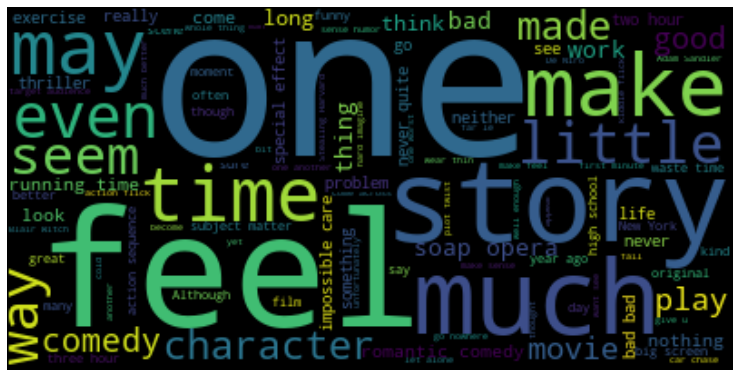

In [63]:
stop_words = stopwords.words('english')
stop_words.append('film')
stop_words.append('movie')
lem = WordNetLemmatizer()

def cleaning(data):
    # 1.Step tokenization yapacak
    text_tokens = word_tokenize(data) # removed the .lower intentionaly 
    
    # 2.Step Remove Puncs
    tokens_without_puncs = [w for w in text_tokens if w.isalpha()]
    
    # 3.Step Remove Stopwords
    tokens_without_sw = [t for t in tokens_without_puncs if t not in stop_words]
    
    # 4.Step Lemmatize
    text_cleaned = [lem.lemmatize(t) for t in tokens_without_sw]
    
    # Joining
    return " ".join(text_cleaned)

neg_words = neg_words_df['Ahmet'].apply(cleaning)
from wordcloud import WordCloud
import matplotlib.pyplot as plt
original = " ".join(neg_words)
wordcloud = WordCloud(background_color = 'white', max_words = 100)

wordcloud.generate(original)

wordcloud = WordCloud( max_words = 900)
wordcloud.generate(original)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

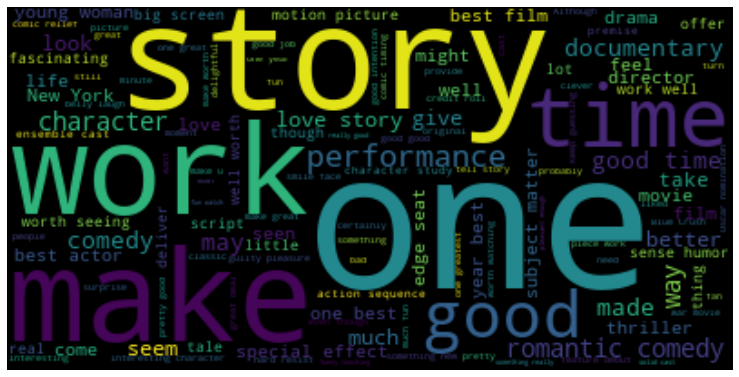

In [64]:
stop_words = stopwords.words('english')
stop_words.append('film')
stop_words.append('movie')
lem = WordNetLemmatizer()

def cleaning(data):
    # 1.Step tokenization yapacak
    text_tokens = word_tokenize(data) # removed the .lower intentionaly 
    
    # 2.Step Remove Puncs
    tokens_without_puncs = [w for w in text_tokens if w.isalpha()]
    
    # 3.Step Remove Stopwords
    tokens_without_sw = [t for t in tokens_without_puncs if t not in stop_words]
    
    # 4.Step Lemmatize
    text_cleaned = [lem.lemmatize(t) for t in tokens_without_sw]
    
    # Joining
    return " ".join(text_cleaned)

pos_words = pos_words_df['Ahmet'].apply(cleaning)
from wordcloud import WordCloud
import matplotlib.pyplot as plt
original = " ".join(pos_words)
wordcloud = WordCloud(background_color = 'white', max_words = 100)

wordcloud.generate(original)

wordcloud = WordCloud( max_words = 900)
wordcloud.generate(original)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [65]:
stop_words = stopwords.words('english')
stop_words.extend(['film','movie'])
lem = WordNetLemmatizer()

def cleaning(data):
    text_tokens = word_tokenize(data) # 1.Step tokenization.Removed .lower intentionaly 
    tokens_without_puncs = [w for w in text_tokens if w.isalpha()]# 2.Step Remove Puncs
    tokens_without_sw = [t for t in tokens_without_puncs if t not in stop_words]# 3.Step Remove Stopwords
    text_cleaned = [lem.lemmatize(t) for t in tokens_without_sw]# 4.Step Lemmatize
    return " ".join(text_cleaned)# Joining

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer

pipeline =Pipeline([  
    ("bow", TfidfVectorizer(analyzer = cleaning)),
    ("tfidf", TfidfTransformer()),
    ("classifier", RandomForestClassifier())
])

X = df["Ahmet"]
y = df["Mehmet"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[4955 1830]
 [1048 7463]]
              precision    recall  f1-score   support

    negative       0.83      0.73      0.77      6785
    positive       0.80      0.88      0.84      8511

    accuracy                           0.81     15296
   macro avg       0.81      0.80      0.81     15296
weighted avg       0.81      0.81      0.81     15296



In [66]:
stop_words = stopwords.words('english')
stop_words.extend(['film','movie','one','story'])
lem = WordNetLemmatizer()

def cleaning(data):
    text_tokens = word_tokenize(data) # 1.Step tokenization.Removed .lower intentionaly 
    tokens_without_puncs = [w for w in text_tokens if w.isalpha()]# 2.Step Remove Puncs
    tokens_without_sw = [t for t in tokens_without_puncs if t not in stop_words]# 3.Step Remove Stopwords
    text_cleaned = [lem.lemmatize(t) for t in tokens_without_sw]# 4.Step Lemmatize
    return " ".join(text_cleaned)# Joining

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer

pipeline =Pipeline([  
    ("bow", TfidfVectorizer(analyzer = cleaning)),
    ("tfidf", TfidfTransformer()),
    ("classifier", RandomForestClassifier())
])

X = df["Ahmet"]
y = df["Mehmet"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[4968 1817]
 [1007 7504]]
              precision    recall  f1-score   support

    negative       0.83      0.73      0.78      6785
    positive       0.81      0.88      0.84      8511

    accuracy                           0.82     15296
   macro avg       0.82      0.81      0.81     15296
weighted avg       0.82      0.82      0.81     15296



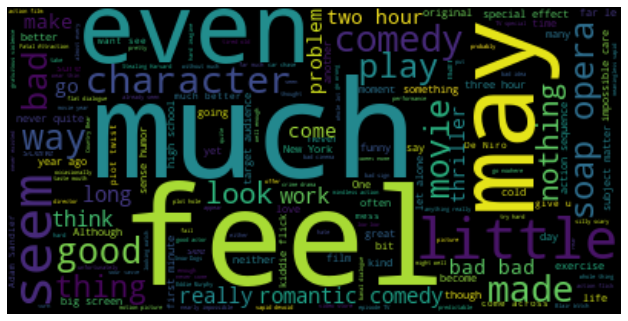

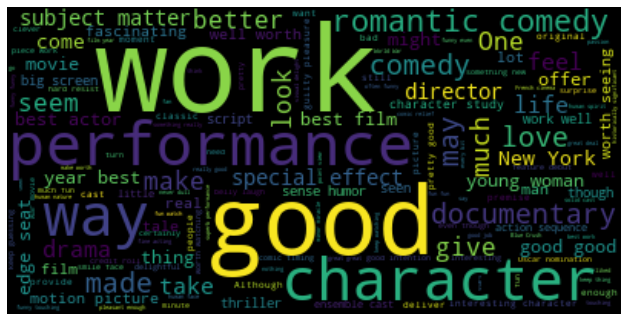

In [70]:
stop_words = stopwords.words('english')
stop_words.extend(['film','movie','one','story','make','time'])
lem = WordNetLemmatizer()

def cleaning(data):
    # 1.Step tokenization yapacak
    text_tokens = word_tokenize(data) # removed the .lower intentionaly 
    
    # 2.Step Remove Puncs
    tokens_without_puncs = [w for w in text_tokens if w.isalpha()]
    
    # 3.Step Remove Stopwords
    tokens_without_sw = [t for t in tokens_without_puncs if t not in stop_words]
    
    # 4.Step Lemmatize
    text_cleaned = [lem.lemmatize(t) for t in tokens_without_sw]
    
    # Joining
    return " ".join(text_cleaned)

print('Negative')
neg_words = neg_words_df['Ahmet'].apply(cleaning)
from wordcloud import WordCloud
import matplotlib.pyplot as plt
original = " ".join(neg_words)
wordcloud = WordCloud(background_color = 'white', max_words = 100)
wordcloud.generate(original)
wordcloud = WordCloud( max_words = 900)
wordcloud.generate(original)
plt.figure(figsize=(11,11))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

print('Positive')
pos_words = pos_words_df['Ahmet'].apply(cleaning)
from wordcloud import WordCloud
import matplotlib.pyplot as plt
original = " ".join(pos_words)
wordcloud = WordCloud(background_color = 'white', max_words = 100)
wordcloud.generate(original)
wordcloud = WordCloud( max_words = 900)
wordcloud.generate(original)
plt.figure(figsize=(11,11))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [78]:
#pos_words.value_counts().sort_values(ascending=False)
print(Counter(pos_words).most_common(15),'\n'*2,Counter(neg_words).most_common(15))

[('', 490), ('good', 71), ('funny', 45), ('best', 41), ('fun', 40), ('love', 34), ('great', 29), ('interesting', 28), ('laugh', 27), ('entertaining', 24), ('better', 21), ('compelling', 20), ('enjoy', 19), ('comedy', 18), ('charm', 16)] 


 [('', 418), ('bad', 39), ('problem', 20), ('much', 20), ('funny', 18), ('drag', 16), ('boring', 15), ('worst', 14), ('terrible', 14), ('work', 14), ('waste', 13), ('dumb', 13), ('offensive', 13), ('nothing', 12), ('character', 12)]


In [124]:
num = 100
pos_most_100 = [i[0] for i in Counter(pos_words).most_common(num)]
neg_most_100 = [i[0] for i in Counter(neg_words).most_common(num)]
common_in_most_100 = [i for i in pos_most_100 if i in neg_most_100]
#print(pos_most_100,'\n'*3)
#print(neg_most_100,'\n'*3)
print(common_in_most_100)

['', 'good', 'funny', 'interesting', 'comedy', 'work', 'way', 'character', 'drama']


In [114]:
pos_words.value_counts()['good']

71

In [123]:
for i in common_in_most_100[1:]:
    if i in pos_words.values:
        print(i,"POSITIVES: ", pos_words.value_counts()[i], "NEGATIVES: ", neg_words.value_counts()[i])

good POSITIVES:  71 NEGATIVES:  11
funny POSITIVES:  45 NEGATIVES:  18
interesting POSITIVES:  28 NEGATIVES:  9
comedy POSITIVES:  18 NEGATIVES:  9
work POSITIVES:  16 NEGATIVES:  14
way POSITIVES:  14 NEGATIVES:  7
character POSITIVES:  13 NEGATIVES:  12
drama POSITIVES:  9 NEGATIVES:  6


In [94]:
stop_words = stopwords.words('english')
stop_words.extend(['film','movie','one','story','make','time'])
lem = WordNetLemmatizer()

def cleaning(data):
    text_tokens = word_tokenize(data) # 1.Step tokenization.Removed .lower intentionaly 
    tokens_without_puncs = [w for w in text_tokens if w.isalpha()]# 2.Step Remove Puncs
    tokens_without_sw = [t for t in tokens_without_puncs if t not in stop_words]# 3.Step Remove Stopwords
    text_cleaned = [lem.lemmatize(t) for t in tokens_without_sw]# 4.Step Lemmatize
    return " ".join(text_cleaned)# Joining

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer

pipeline =Pipeline([  
    ("bow", TfidfVectorizer(analyzer = cleaning)),
    ("tfidf", TfidfTransformer()),
    ("classifier", RandomForestClassifier())
])

X = df["Ahmet"]
y = df["Mehmet"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[4963 1822]
 [1018 7493]]
              precision    recall  f1-score   support

    negative       0.83      0.73      0.78      6785
    positive       0.80      0.88      0.84      8511

    accuracy                           0.81     15296
   macro avg       0.82      0.81      0.81     15296
weighted avg       0.82      0.81      0.81     15296

